In [1]:
import sys
import os
import numpy as np
import csv
import math
import time 
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd

from Analyze_lib_1 import Analyze_SHB, prep_data_analytics

from Analyze_lib_2 import analyze_data, algo_analysis, roc_perf_analysis, roc_plot_check, case_check, slums_analysis  


In [2]:
# Linux and macOS has "/" to denote directories whereas windows has "\". 

paths = []
paths.append(r'/Users/smshovan/Downloads/Structured/0_AllPatients_Root/0_AllPatients')
    

In [3]:
# block to create variables and lists to hold necessary data. 
# There are 52 folders for each patient data, although there should be 50 folders. 
IRBOfInterest_Array = np.array([
                                  ["BB_09_174_2017-09-27", 0, 23]          , #MCI ; 23/30 #analysis looks good
                                  ["EM_09_211_2017-09-19", 1, 23], #Alzheimer's ; 23/30 #analysis looks good
                                   ["AN_09_119_2017-09-05", 0, 27], #MCI ; 27/30; #xxx analysis outlier  
                                 ["FJ_09_217_2017-09-12", 1, 27], #Alzheimer's ; 27/30 #analysis looks good
                                  #["DK_09_135_2017-09-19", 1, 9], #Multi-imfarct dementia; 09/30 #analysis looks good
                                  ["EM_08_213_2017-08-15", 1, 17], #Alzheimer's; 17/30 #analysis looks good
                                  ["DL_08_214_2017-08-30", 1, 11], #Alzheimer's; 11/30 #cant say bad results, 11 is so low 
                                  ["CT_09_203_2017-09-27", 1, 15], #Alzheimer's; 15/30 #analysis looks good
                             #incomplete     #["EB_07_157_2017-07-26", 1, 22], #Alzheimer's; 22/30
                                  ["DK_08_137_2017-08-29", 1, 8], #DK_08_137_2017-08-29; 08/30
                                  ["BM_10_188_2017-10-04", 1, 16], #multi imfarct dementia; 16/30
                                  ["BC_07_164_2017-07-19", 1, 2], #Alzheimer's; 2/30
                                  ["AC_10_177_2017-10-13", 1, 25], #multi imfarct dementia; 25/30
                                  ["AP_05_168_2017-05-05", 1, 30], #multi imfarct dementia; 30/30
                                  ["BJ_05_217_2017-05-01", 1, 25], #multi imfarct dementia; 25/30 #*** very rigid data and only few data points
                                  ["BE_05_176_2017-05-12", 1, 27], #multi imfarct dementia; 27/30 
                                  ["CI_09_161_2017-09-19", 0, 26], #MCI ; 26/30
                                  ["DS_08_244_2017-08-22", 0, 26], #MCI; 26/30 #xxx outlier
                             #incomplete     #["CD_11_198_2017-11-06", 0, 23], #MCI; 23/30
                                  ["CI_07_177_2017-07-19", 0, 24], #MCI; 24/30
                             #incomplete     #["AN_05_121_2017-05-12", 0, 21], #MCI; 21/30
                                  ["Cl_05_215_2017-05-01", 0, 29], #MCI; 29/30
                                  ["CI_04_166_2017-04-11", 0, 28], #MCI; 28/30
                                  ["FC_06_162_2017-06-05", 0, 27], #MCI; 27/30
                                  ["EB_04_138_2017-04-25", 0, 30], #MCI; 30/30
                                  ["CA_03_159_2017-03-21", 0, 30], #MCI; 30/30
                                  ["CI_03_166_2017-03-24", 0, 27], #MCI; 27/30
                             #incomplete     #["AC_06_123_2017-06-02", 0, 20], #MCI; 20/30 
                                  ["FG_08_137_2017-08-29", 0, 30], #Normal; 30/30
                                  ["BM_04_186_2017-04-04", 0, 28], #Normal; 28/30
                                  ["MT_05_160_2017-05-12", 1, 25], #Alzheimers; 25/30
                                  ["SW_07_160_2017-07-24", 1, 9], #; 9/30
                                  ["SS_08_131_2017-08-25", 1, 19],
                                  ["MW_09_197_2017-09-11", 1, 23],
                                  ["TH_09_206_2017-09-13", 1, 17],
                                  ["SS_04_156_2017-04-03", 1, 20],  
                                  ["GA_10_149_2017-10-06", 1, 19],
                                  ["GA_04_143_2017-04-05", 1, 16],
                             #incomplete     #["SH_04_153_2017-04-14", 1, 15],
                                  ["LO_05_167_2017-05-03", 1, 9],
                                  ["LW_03_110_2017-03-28", 1, 9],
                                  ["KK_05_175_2017-05-23", 1, 22],
                                  ["MW_04_207_2017-04-05", 1, 19],
                                  ["MW_05_208_2017-05-03", 1, 22],
                                  ["KB_10_192_2017-10-31", 1, 20],
                                  ["PB_07_168_2017-07-21", 0, 23],
                                  ["SJ_08_223_2017-08-25", 0, 29],
                                  ["LD_09_221_2017-09-29", 0, 21],
                              #incomplete    #["KL_05_221_2017-05-03", 0, 26],
                                  ["KL_11_223_2017-11-01", 0, 25],
                                      ])

# Tags are used for timestamps alternative to easily find sensor data

SLUMS_TS_Tags = [ 'T1: ask and answer Q1 (day of week)',
                      'T2: after Q1 score; before Q2 ask',
                      'T3: ask and answer Q2 (what year)',
                      'T4: after Q2 score; before Q3 ask',
                      'T5: ask and answer Q3 (which state)',
                      'T6: after Q3 score; during ask to remember 5 objects in Q4; before Q5 ask',
                      'T7: ask math ques Q5 description part; no ques asked',
                      'T8: ask and answer math subques Q5_1 spend amount',
                      'T9: ask and answer math subques Q5_2 how much left; enter Q5 tot score',
                      'T10: after Q5 score; before Q6 ask',
                      'T11: ask and answer Q6 name animals 1 minute',
                      'T12: after Q6 score; before Q7 ask',
                      'T13: ask and answer Q7 remembering 5 objects',
                      'T14: after Q7 score; before Q8 ask',
                      'T15: ask and answer Q8 numbers backwards',
                      'T16: after Q8 score; before Q9 ask',
                      'T17: ask and answer Q9 clock draw',
                      'T18: after Q9 score; before Q10_1 ask',
                      'T19: ask and answer Q10_1 place X in triangle',
                      'T20: after Q10_1 score; before Q10_2 ask',
                      'T21: ask and answer Q10_2 which is largest figure',
                      'T22: after Q10_2 score; before 11 ask',
                      'T23: Q11 listen to story part; no ques asked',
                      'T24: ask and answer Q11_1 female name',
                      'T25: ask and answer Q11_2 what work',
                      'T26: ask and answer Q11_3 when go back work',
                      'T27: ask and answer Q11_4 which state; enter Q11 total score'
                      ]

# not sure what is the purpose of ignoring Questions
IgnoreQues_4_TotScore = ['T7: ask math ques Q5 description part; no ques asked',
                                                 'T8: ask and answer math subques Q5_1 spend amount',
                                                 'T23: Q11 listen to story part; no ques asked',
                                                 'T23: Q11 listen to story part; no ques asked',
                                                 'T24: ask and answer Q11_1 female name',
                                                 'T25: ask and answer Q11_2 what work',
                                                 'T26: ask and answer Q11_3 when go back work']

NumPressureSensors = 5 # top and bottom each 
NumPressureSensors_Combined = 10 # although 1 of the 10 sensors is not functional
CV_threshold = 0.2 
Stress_Threshold = int(1)
reductionFactor = float(0.5)

CV_threshold_arr = [0.3,0.0,0.14,0.0,0.13,0.0,0.14, 0.07, 0.24,0.0,0.8,0.0,0.37,0,0.16,0,1.55,0, 0.45,0.0,0.42,0.0,0.61, 0.1, 0.1, 0.1, 0.15]

# not sure what are users and what is '0' user. 
Overall_Stress_AllUsers = []

AllUsers_Performance = [] 

# not sure what are the purposes.

Thresh_ScoreDrop_Dementia = 17
Thresh_SLUMS_Dementia = 20
DefiniteDementia_Thresh = 10


In [4]:
def specific_sensor_arr(user_k, question_j, sensor_n, Chair_Sensors_all_array):
    sensorVals = []
    for i in range( len( Chair_Sensors_all_array[user_k][question_j] ) ):
        sensorVals.append( Chair_Sensors_all_array[user_k][question_j][i][sensor_n+2] ) #
    sensorVals_nparr = np.asarray(sensorVals).astype(np.float)
    return sensorVals_nparr

In [5]:
def ZeroCorrection( temparr ):
    
    temparr_np = np.asarray(temparr).astype(np.float)
    num_rows, num_cols = temparr_np.shape

    temparr2_np = np.empty([num_rows, num_cols], dtype=int)


    for i in range(num_rows):
        for j in range(num_cols):
            if ( int(temparr_np[i][j]) > int(0) ):
                temparr2_np[i][j] = temparr_np[i][j]
            else:
                if ( int(j) == int(0) ):
                    for k in range(1, num_cols, 1):
                        if( int(temparr_np[i][j+k]) > int(0) ):
                            temparr2_np[i][j] = temparr_np[i][j+k]
                            break
                else:
                    for k in range(1, (j+1), 1):
                        if( int(temparr_np[i][j-k]) > int(0) ):
                            temparr2_np[i][j] = temparr_np[i][j-k]
                            break
    return temparr2_np

In [6]:
def GetCV(temparr):

    len_CVCalc = 20 #20 data points, this 2 seconds for 10 Hz sampling 

    temparr = ZeroCorrection(temparr)
    
    temparr_np = np.asarray(temparr).astype(np.float)
    num_rows, num_cols = temparr_np.shape

    returnArr = [] 
    for i in range(num_rows):
        tempRow = []
        for j in range(len_CVCalc, num_cols, 1):
            tempRow.append(    np.nanstd( temparr[i][j-len_CVCalc:j:1] )/ np.nanmean( temparr[i][j-len_CVCalc:j:1] )    )
        returnArr.append(tempRow)
        
    return returnArr

In [7]:
# this is the main algorithm 
sm_max_temp = []
sm_global_max_all= []
for path in paths: # although there is one path in the list. Maybe that's the reason there is one user right now.        
        for root, dirs, files in os.walk(path): #root -> paths, dirs -> folders, files -> files in the path directory
            
            patient_no = 0;
            
            max_stress = []
            if( str(root.split("/")[-1]) in IRBOfInterest_Array[:,0] ): # For each 50 patients. 
                
                
                
                # take the name of the folder.
                IRBOfInterest = str(root.split("/")[-1]) 
                
                # get the ground truth in Dementia_GroundTruth varible for the current patient
                Dementia_GroundTruth = -1
                for k in range( len(IRBOfInterest_Array) ):
                    if ( str(IRBOfInterest_Array[k][0]) == str(IRBOfInterest) ):
                        Dementia_GroundTruth = IRBOfInterest_Array[k][1]
                        
                
                # there exists a file in each folder of patients starting with 1a_Raw_....._RECORDS.text for patient records. 
                for filename in files:
                    if ( ('_RECORDS.txt' in filename) and ('1a_Raw_' in filename) ):
                        
                        ChairData_all_Combined = []
                        ChairData_all_N101 = []
                        ChairData_all_N102 = []

                        ScoreArr_Combined = []
                        ScoreArr_N101 = []
                        ScoreArr_N102 = []

                        ValCheckArr_N101 = []
                        ValCheckArr_N102 = []

                        ConsiderQuesArr = []
                        ActualScoreArr = []
                        FullScoreArr = []
                        DelayArr = []

                        Chair_Sensors_entry_session_all = []

                        SLUMS_received_score_all = []

                        #The following file has column (timestamp, labels/tags, 10 sensor data for the current patient)
                        # this block generates ChairData_all_Combined from sensor data where only ques and ans session are tagged. 
                        # ChairData_all_Combined[0][:] -> 27 (0-26) tags having 10 sensor time series values 
                        ChairData_Combined_file = root + "/" + '4g_' + IRBOfInterest + '_ChairData_analysis_withLabels_withoutGap_sorted_withNewLabels_matched.csv'
                        ChairData_perQues_Combined = [ [] for i in range(len(SLUMS_TS_Tags)) ]
                        
                        with open(ChairData_Combined_file, 'r') as f:
                            reader = csv.reader(f)
                            for row in reader:
                                for tags in SLUMS_TS_Tags:
                                    if str(tags) in str(row[1]): #second element of each row is having the tag
                                        temp_index = (int( tags.split(': ')[0].replace('T', '').replace('\n', '') ) - 1 ) #0-26 index for Tags T1...T27
                                        ChairData_perQues_Combined[temp_index].append( row )
                        ChairData_all_Combined.append( ChairData_perQues_Combined )
                        
                        # only top 5 sensors
                        ChairData_N101_file = root + "/" + '4g_' + IRBOfInterest + '_ChairData_analysis_withLabels_withoutGap_sorted_withNewLabels_matched_n101.csv'
                        ChairData_perQues_N101 = [ [] for i in range(len(SLUMS_TS_Tags)) ]

                        with open(ChairData_N101_file, 'r') as f:
                            reader = csv.reader(f)
                            for row in reader:
                                for tags in SLUMS_TS_Tags:
                                    if str(tags) in str(row[1]):
                                        temp_index = (int( tags.split(': ')[0].replace('T', '').replace('\n', '') ) - 1 ) #0-26 index for Tags T1...T27
                                        ChairData_perQues_N101[temp_index].append( row )

                        ChairData_all_N101.append( ChairData_perQues_N101 ) 

                        # only bottom 5 sensors
                        ChairData_N102_file = root + "/" + '4g_' + IRBOfInterest + '_ChairData_analysis_withLabels_withoutGap_sorted_withNewLabels_matched_n102.csv'
                        ChairData_perQues_N102 = [ [] for i in range(len(SLUMS_TS_Tags)) ]

                        with open(ChairData_N102_file, 'r') as f:
                            reader = csv.reader(f)
                            for row in reader:
                                for tags in SLUMS_TS_Tags:
                                    if str(tags) in str(row[1]):
                                        temp_index = (int( tags.split(': ')[0].replace('T', '').replace('\n', '') ) - 1 ) #0-26 index for Tags T1...T27
                                        ChairData_perQues_N102[temp_index].append( row )

                        ChairData_all_N102.append( ChairData_perQues_N102 )
                        
                        sm_global_rep = []
                        max_stress_patient = []
                        sm_global_max = []
                        # now consider per question of per patient
                        for ques_j in range(len(SLUMS_TS_Tags)): #range 0 to 26 (please refer to definition of T1-T27 in SLUMS_TS_Tags in the beginning)
                            
                            # From TimeStampinfo_SLUMS csv file, we are getting scores from SLUMS exam. 
                            SLUMS_CSVfile = root + "/" + '2f_' + IRBOfInterest + '_TimeStampinfo_SLUMS.csv'
                            with open(SLUMS_CSVfile, 'r') as f:
                                reader = csv.reader(f)
                                for row in reader:
                                    if ( str(SLUMS_TS_Tags[ques_j]) in str(row[7]) or str(SLUMS_TS_Tags[ques_j]) in str(row[7]) ): #**** hard coding
                                        ConsiderQuesArr.append(SLUMS_TS_Tags[ques_j]) # Consider only those questions in the Q/A session
                                        ActualScoreArr.append(row[10]) # score received
                                        FullScoreArr.append(row[9]) # out of this score
                                        DelayArr.append(row[6]) # interval (can be make use of)
                            
                            # fetch per question and per sensor basis from ChairData_all_Combined array to create a new array having 
                            # sensor data of a particular question
                            temparr_Combined = []
                            for sensor_i in range(NumPressureSensors_Combined):
                                temparr_Combined.append( specific_sensor_arr(0, ques_j, sensor_i, ChairData_all_Combined) ) #***>>> choose N101 or N102 **hardcoding user 0 
                            temparr_Combined_np = np.asarray(temparr_Combined).astype(np.float)
                            
                            # same for top 5 sensors
                            temparr_N101 = []
                            for sensor_i in range(NumPressureSensors):
                                temparr_N101.append( specific_sensor_arr(0, ques_j, sensor_i, ChairData_all_N101) ) #***>>> **hardcoding user 0 
                            temparr_N101_np = np.asarray(temparr_N101).astype(np.float)
                            
                            # same for bottom 5 sensors
                            temparr_N102 = []
                            for sensor_i in range(NumPressureSensors):
                                temparr_N102.append( specific_sensor_arr(0, ques_j, sensor_i, ChairData_all_N102) ) #***>>> **hardcoding user 0  
                            temparr_N102_np = np.asarray(temparr_N102).astype(np.float)
                            
                            
                            #For each time series data for each 5 top and bottom sensors, 
                            #we are calculating a set of coefficients of variations with each 20 points  
                            CV_arr_N101 = GetCV(temparr_N101_np)
                            CV_arr_N101_np = np.asarray(CV_arr_N101).astype(np.float)
                            
                            if (len(CV_arr_N101_np[0]) > 0):
                                
                                sm_global_max.append(np.max(CV_arr_N101_np))
                            else:
                                sm_global_max.append(0)
                        
                                #print(str(ques_j) + " : "+ str(sm_global_max))
                            
                            
                            
                            CV_arr_N102 = GetCV(temparr_N102_np)
                            CV_arr_N102_np = np.asarray(CV_arr_N102).astype(np.float)
                            
                            
                        
                            #Calculate the average of all sensors' average CV as valCheckArr.
                            max_N101 = -1
                            ValCheckTest = 0.0
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N101_np[ii].size
                                temp = 0.0
                                for k in range(num_C):
                                    temp = temp + CV_arr_N101_np[ii][k]
                                    
                                if (num_C > 0):
                                    temp = float(temp)/float(num_C)
                                ValCheckTest = ValCheckTest + temp
                            ValCheckTest = float(ValCheckTest) / float(NumPressureSensors)
                            ValCheckArr_N101.append(ValCheckTest)
                            
                                
                            
                                    

                            #...... max 
                            
                            max_stress = []
                            
                            
                            
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N101_np[ii].size
                                for k in range(num_C):
                                    if ( float(CV_arr_N101_np[ii][k]) > float(CV_threshold_arr[ques_j])  ):
                                        max_stress.append(float(CV_arr_N101_np[ii][k]))
                                    
                            
#                             if (len(max_stress_N101) > 0) :
#                                 sm_max_N101 = np.quantile(np.asarray(max_stress_N101).astype(np.float), .75)
                                
#                                 print(sm_max_N101)
                                                                   
                            #Count how many of the top sensor are reporting above threshold. 
                            above_CV_Thresh = 0
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N101_np[ii].size
                                for k in range(num_C):
                                    if ( float(CV_arr_N101_np[ii][k]) > float(CV_threshold_arr[ques_j]) ):
                                        above_CV_Thresh = above_CV_Thresh + 1
                                        break
                                    
                            #Second approach is to count maximum number of sensors reporting stress for a given 
                            # time of CV
                            above_CV_Thresh_V2 = 0
                            num_C = CV_arr_N101_np[0].size

                            overall_Temp = []
                            for k in range(num_C):
                                numTemp = 0
                                for ii in range(NumPressureSensors):
                                    if ( float(CV_arr_N101_np[ii][k]) > float(CV_threshold_arr[ques_j]) ):
                                        numTemp = numTemp + 1
                                overall_Temp.append(numTemp)
                            overall_Temp_np = np.asarray(overall_Temp).astype(np.int)
                            if (overall_Temp_np.size > 0):
                                above_CV_Thresh_V2 = np.nanmax(overall_Temp_np)
                                
                            #but first approach is taken into consideration    
                            ScoreArr_N101.append(above_CV_Thresh) 
                            
                            #Same thing is done for bottom 5 sensors
                            
                            ValCheckTest = 0.0
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N102_np[ii].size
                                temp = 0.0
                                for k in range(num_C):
                                    temp = temp + CV_arr_N102_np[ii][k]
                                if (num_C > 0):
                                    temp = float(temp)/float(num_C)
                                ValCheckTest = ValCheckTest + temp
                            ValCheckTest = float(ValCheckTest) / float(NumPressureSensors)
                            ValCheckArr_N102.append(ValCheckTest)

                            #... max
                            
                            above_CV_Thresh = 0
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N102_np[ii].size
                                for k in range(num_C):
                                    if ( float(CV_arr_N102_np[ii][k]) > float(CV_threshold_arr[ques_j]) ):
                                        max_stress.append(float(CV_arr_N102_np[ii][k]))
                                    
                            
                            
                            if (len(max_stress) > 0) :
                                
                                sm_max = np.quantile(np.asarray(max_stress).astype(np.float), .95)
                                 
                                
                                reductionFactor =  .5 ;#(2 - sm_max)/4; #.65
                                #print(reductionFactor)
                                
                            
                            #.......................
                            above_CV_Thresh = 0
                            for ii in range(NumPressureSensors):
                                num_C = CV_arr_N102_np[ii].size
                                for k in range(num_C):
                                    if ( float(CV_arr_N102_np[ii][k]) > float(CV_threshold_arr[ques_j] )):
                                        above_CV_Thresh = above_CV_Thresh + 1
                                        break

                            #.......................
                            above_CV_Thresh_V2 = 0
                            num_C = CV_arr_N102_np[0].size

                            overall_Temp = []
                            for k in range(num_C):
                                numTemp = 0
                                for ii in range(NumPressureSensors):
                                    if ( float(CV_arr_N102_np[ii][k]) > float(CV_threshold_arr[ques_j]) ):
                                        numTemp = numTemp + 1
                                overall_Temp.append(numTemp)
                            overall_Temp_np = np.asarray(overall_Temp).astype(np.int)
                            if (overall_Temp_np.size > 0):
                                above_CV_Thresh_V2 = np.nanmax(overall_Temp_np)
                                
                            ScoreArr_N102.append(above_CV_Thresh)
                            
                        sm_global_max_all.append(sm_global_max)
                        
                        #.......................
                        TotScore = 0.0
                        ReceivedScore = 0.0
                        
                        # Calculate the total received score from questions ignoring few questions.
                        for i in range(len(ConsiderQuesArr)):
                            consider = 1
                            for j in range(len(IgnoreQues_4_TotScore)):
                                if ( str(IgnoreQues_4_TotScore[j]) in str(ConsiderQuesArr[i]) ):
                                    consider = 0
                            if( int(consider) == int(1) ):
                                TotScore = TotScore + float(FullScoreArr[i])
                                ReceivedScore = ReceivedScore + float(ActualScoreArr[i])
                        
                        #label the status of each questions based of # of stress reporting sensors 
                        StressStatus_N101 = []
                        for i in range(len(ConsiderQuesArr)):
                            for jj in range(len(SLUMS_TS_Tags)):
                                if ( str(ConsiderQuesArr[i]) == str(SLUMS_TS_Tags[jj]) ):
                                    if ( math.isnan(ScoreArr_N101[jj]) ):
                                        StressStatus_N101.append("N/A")
                                    elif ( float(ScoreArr_N101[jj]) > Stress_Threshold):
                                        StressStatus_N101.append("S")
                                    elif ( float(ScoreArr_N101[jj]) <= Stress_Threshold ):
                                        StressStatus_N101.append("NS")
                                    else:
                                        StressStatus_N101.append("??")

                        # same for stress 
                        StressStatus_N102 = []
                        for i in range(len(ConsiderQuesArr)):
                            for jj in range(len(SLUMS_TS_Tags)):
                                if ( str(ConsiderQuesArr[i]) == str(SLUMS_TS_Tags[jj]) ):
                                    if ( math.isnan(ScoreArr_N102[jj]) ):
                                        StressStatus_N102.append("N/A")
                                    elif ( float(ScoreArr_N102[jj]) > Stress_Threshold):
                                        StressStatus_N102.append("S")
                                    elif ( float(ScoreArr_N102[jj]) <= Stress_Threshold ):
                                        StressStatus_N102.append("NS")
                                    else:
                                        StressStatus_N102.append("??")
                                        
                        # label the question was stressful or not based on both top and bottom sensors 
                        Overall_Stress = []

                        Overall_Stress_write = []
                        Overall_Stress_write.append( IRBOfInterest )

                        for i in range(len(StressStatus_N101)):
                            if ( (str(StressStatus_N101[i]) == "S") or (str(StressStatus_N102[i]) == "S") ):
                                Overall_Stress.append("S_Yes")
                                Overall_Stress_write.append(1)
                            else:
                                Overall_Stress.append("S_Other")
                                Overall_Stress_write.append(0)

                        # although we have only one user right now. 
                        Overall_Stress_AllUsers.append( Overall_Stress_write ) 

                        ReviseScoreQuestions = ['T1: ask and answer Q1 (day of week)',
                                               'T3: ask and answer Q2 (what year)',
                                               'T5: ask and answer Q3 (which state)',
                                               'T11: ask and answer Q6 name animals 1 minute',
                                               'T13: ask and answer Q7 remembering 5 objects',
                                               'T15: ask and answer Q8 numbers backwards'
                                               ]
                        NoReviseScoreQuestions = ['T17: ask and answer Q9 clock draw',
                                               'T19: ask and answer Q10_1 place X in triangle',
                                               'T21: ask and answer Q10_2 which is largest figure'
                                               ]

                        NewScore = [float(0.0) for col in range(len(ConsiderQuesArr))]

                        #print( NewScore)

                        #------------------------------------
                        stress_5_0 = "S_Other"
                        stress_5_1 = "S_Other"
                        stress_5_2 = "S_Other"

                        stress_11_0 = "S_Other"
                        stress_11_1 = "S_Other"
                        stress_11_2 = "S_Other"
                        stress_11_3 = "S_Other"
                        stress_11_4 = "S_Other"


                        for i in range(len(ConsiderQuesArr)):

                            #..................
                            for j1 in range(len(NoReviseScoreQuestions)):
                                if ( str(ConsiderQuesArr[i]) == str(NoReviseScoreQuestions[j1]) ):
                                    NewScore[i] = float(ActualScoreArr[i])

                            #..................        
                            for j2 in range(len(ReviseScoreQuestions)):
                                if ( str(ConsiderQuesArr[i]) == str(ReviseScoreQuestions[j2]) ):
                                    if ( str(Overall_Stress[i]) == "S_Yes"):
                                        NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                    elif ( str(Overall_Stress[i]) == "S_Other"):
                                        NewScore[i] = float(ActualScoreArr[i])

                            #..................
                            #Q9 scoring 
                            if ( str(ConsiderQuesArr[i]) == 'T7: ask math ques Q5 description part; no ques asked' ):
                                stress_5_0 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T8: ask and answer math subques Q5_1 spend amount' ):
                                stress_5_1 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T9: ask and answer math subques Q5_2 how much left; enter Q5 tot score' ):
                                stress_5_2 = Overall_Stress[i]
                                if ( str(stress_5_0) ==  "S_Yes"):
                                    NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                elif ( str(stress_5_0) ==  "S_Other"):
                                    if ( float(ActualScoreArr[i]) == float(0)):
                                        NewScore[i] = float(ActualScoreArr[i])
                                    elif ( float(ActualScoreArr[i]) == float(1)):
                                        if ( str(stress_5_1) ==  "S_Yes"):
                                            NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                        elif ( str(stress_5_1) ==  "S_Other"):
                                            NewScore[i] = float(ActualScoreArr[i])
                                    elif ( float(ActualScoreArr[i]) == float(2)):
                                        if ( str(stress_5_2) ==  "S_Yes"):
                                            NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                        elif ( str(stress_5_2) ==  "S_Other"):
                                            NewScore[i] = float(ActualScoreArr[i])
                                    elif ( float(ActualScoreArr[i]) == float(3)):
                                        newScore = 0.0
                                        if ( str(stress_5_1) ==  "S_Yes"):
                                            newScore = newScore + float(1.0)*reductionFactor
                                        elif ( str(stress_5_1) ==  "S_Other"):
                                            newScore = newScore + float(1.0)
                                        if ( str(stress_5_2) ==  "S_Yes"):
                                            newScore = newScore + float(2.0)*reductionFactor
                                        elif ( str(stress_5_2) ==  "S_Other"):
                                            newScore = newScore + float(2.0)
                                        NewScore[i] = float(newScore)


                            #..................
                            #Q11 scoring
                            if ( str(ConsiderQuesArr[i]) == 'T23: Q11 listen to story part; no ques asked' ):
                                stress_11_0 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T24: ask and answer Q11_1 female name' ):
                                stress_11_1 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T25: ask and answer Q11_2 what work' ):
                                stress_11_2 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T26: ask and answer Q11_3 when go back work' ):
                                stress_11_3 = Overall_Stress[i]
                            elif ( str(ConsiderQuesArr[i]) == 'T27: ask and answer Q11_4 which state; enter Q11 total score' ):
                                stress_11_4 = Overall_Stress[i]
                                if ( str(stress_11_0) ==  "S_Yes" ):
                                    NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                elif ( str(stress_11_0) ==  "S_Other" ):
                                    if ( (str(stress_11_1) ==  "S_Yes") or (str(stress_11_2) ==  "S_Yes") or (str(stress_11_3) ==  "S_Yes") or (str(stress_11_4) ==  "S_Yes") ):
                                        NewScore[i] = float(ActualScoreArr[i])*float(reductionFactor)
                                    else:
                                        NewScore[i] = float(ActualScoreArr[i])
                        #print( NewScore)
                        totNewScore = float(0.0)
                        for k in range(len(NewScore)):
                            totNewScore = totNewScore + float(NewScore[k])
                        #print( ActualScoreArr )
                        #print( "**** totNewScore is: " + str(totNewScore))


                        DementiaTemp = 0
                        for i in range(len(ConsiderQuesArr)):
                            if ( str(ConsiderQuesArr[i]) == 'T9: ask and answer math subques Q5_2 how much left; enter Q5 tot score' ):
                                if (Overall_Stress[i] == "S_Yes"):
                                    DementiaTemp = 1
                            if ( str(ConsiderQuesArr[i]) == 'T13: ask and answer Q7 remembering 5 objects' ):
                                if (Overall_Stress[i] == "S_Yes"):
                                    DementiaTemp = 1



                        #-----------------------------

                        DiagnosisResult_NewNew = -1
                        if ( int(DementiaTemp) == int(1) ):
                            DiagnosisResult_NewNew = 1
                        elif ( int(DementiaTemp) == int(0) ):
                            DiagnosisResult_NewNew = 0





                        DropInScore = ( (float(ReceivedScore) - float(totNewScore)) / float(ReceivedScore) )*100.0


                        DiagnosisResult_New = -1
                        if ( float(totNewScore) < float(Thresh_ScoreDrop_Dementia) ):
                            DiagnosisResult_New = 1
                        elif ( float(totNewScore) >= float(Thresh_ScoreDrop_Dementia) ):
                            DiagnosisResult_New = 0

                        #if( float(ReceivedScore) <= float(DefiniteDementia_Thresh) ):
                        #    DiagnosisResult_New = 1


                        #-----------------------------
                        DiagnosisResult_SLUMS = -1
                        if ( float(ReceivedScore) < float(Thresh_SLUMS_Dementia) ):
                            DiagnosisResult_SLUMS = 1
                        elif ( float(ReceivedScore) >= float(Thresh_SLUMS_Dementia) ):
                            DiagnosisResult_SLUMS = 0

                        #-----------------------------






                        #================================================
                        #print( IRBOfInterest)
                        writeAnalytics_arr = []


                        for i in range(len(ConsiderQuesArr)):
                            for jj in range(len(SLUMS_TS_Tags)):
                                if ( str(ConsiderQuesArr[i]) == str(SLUMS_TS_Tags[jj]) ):
                                    #print jj
                                    temp = []

                                    temp.append( str(i) )
                                    temp.append( str(ConsiderQuesArr[i]) ) 
                                    #temp.append( str(ScoreArr_Combined[jj]) )
                                    temp.append( str(ScoreArr_N101[jj]) )
                                    temp.append( str(ScoreArr_N102[jj]) )
                                    temp.append( str(ActualScoreArr[i]) )
                                    temp.append( str(DelayArr[i]) )

                                    writeAnalytics_arr.append( temp )

                                    #wow print '{:10s}  {:40s} {:20s} {:20s}  {:20s}  {:20s}  {:20s}  {:20s}'.format( str(i), str(ConsiderQuesArr[i][0:30]), str(ValCheckArr_N101[jj]), str(ValCheckArr_N102[jj]), str(ScoreArr_N101[jj]), str(ScoreArr_N102[jj]), str(ActualScoreArr[i]), str(DelayArr[i]) )
                                    #print( '{:40s} {:20s}  {:20s}  {:20s}  {:20s}'.format( str(ConsiderQuesArr[i][0:30]), str(ScoreArr_N101[jj]), str(ScoreArr_N102[jj]), str(ActualScoreArr[i]), str(NewScore[i]) )        )                                                                                                    
                                    #print "\n" + str(i) + "  " + str(ConsiderQuesArr[i]) + "  " + str(ScoreArr_N101[i]) + "  " + str(ScoreArr_N102[i]) + "  " + str(ActualScoreArr[i]) + "  " + str(DelayArr[i]) + "\n"


                        #print( " + + + + + ")
                        #print( str(IRBOfInterest) + " // " + str(TotScore) + " // " + str(ReceivedScore) + " // " + str(totNewScore) + " // " + str(DropInScore))

                        #..................
                        #..................
                        tempArr = []
                        tempArr.append( str(IRBOfInterest) )
                        #..................
                        tempArr.append( str(Dementia_GroundTruth) ) 
                        tempArr.append( str(DiagnosisResult_SLUMS) )
                        tempArr.append( str(DiagnosisResult_New) )
                        #..................
                        #tempArr.append( str(TotScore) )
                        tempArr.append( str(ReceivedScore) )
                        tempArr.append( str(totNewScore) )
                        tempArr.append( str(DropInScore) )
                        tempArr.append( str(DiagnosisResult_NewNew) )
                        #..................

                        AllUsers_Performance.append(tempArr)
                  
                    

<ipython-input-4-dec253b15b9e>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sensorVals_nparr = np.asarray(sensorVals).astype(np.float)
<ipython-input-7-476d0ef77ed7>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temparr_Combined_np = np.asarray(temparr_Combined).astype(np.float)
<ipython-input-7-476d0ef77ed7>:119: DeprecationWarn

In [8]:
TP_SLUMS = 0
FP_SLUMS = 0
TN_SLUMS = 0
FN_SLUMS = 0
for k in range( len(AllUsers_Performance) ):
    if( (int( AllUsers_Performance[k][1] ) == int(1)) and (int( AllUsers_Performance[k][2] ) == int(1)) ):
        TP_SLUMS = TP_SLUMS + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(0)) and (int( AllUsers_Performance[k][2] ) == int(1)) ):
        FP_SLUMS = FP_SLUMS + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(1)) and (int( AllUsers_Performance[k][2] ) == int(0)) ):
        FN_SLUMS = FN_SLUMS + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(0)) and (int( AllUsers_Performance[k][2] ) == int(0)) ):
        TN_SLUMS = TN_SLUMS + 1

print( " TP_SLUMS: " + str(TP_SLUMS) + " FP_SLUMS: " + str(FP_SLUMS) + " TN_SLUMS: " + str(TN_SLUMS) + " FN_SLUMS: " + str(FN_SLUMS) )

sensitivity_SLUMS = (float(TP_SLUMS)/float(TP_SLUMS + FN_SLUMS))*100.0
specificity_SLUMS = (float(TN_SLUMS)/float(TN_SLUMS + FP_SLUMS))*100.0
accuracy_SLUMS = (TP_SLUMS + TN_SLUMS )/ ( TP_SLUMS + TN_SLUMS + FP_SLUMS + FN_SLUMS)
PPV_SLUMS = (float(TP_SLUMS)/float(TP_SLUMS + FP_SLUMS))*100.0

print( "Sensitivity SLUMS is: " + str( sensitivity_SLUMS ))
print( "Specificity SLUMS is: " + str( specificity_SLUMS ))
print( "Accuracy SLUMS is: " + str( accuracy_SLUMS ))


 TP_SLUMS: 14 FP_SLUMS: 0 TN_SLUMS: 17 FN_SLUMS: 12
Sensitivity SLUMS is: 53.84615384615385
Specificity SLUMS is: 100.0
Accuracy SLUMS is: 0.7209302325581395


In [9]:
TP_New = 0
FP_New = 0
TN_New = 0
FN_New = 0
for k in range( len(AllUsers_Performance) ):
    if( (int( AllUsers_Performance[k][1] ) == int(1)) and (int( AllUsers_Performance[k][3] ) == int(1)) ):
        TP_New = TP_New + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(0)) and (int( AllUsers_Performance[k][3] ) == int(1)) ):
        FP_New = FP_New + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(1)) and (int( AllUsers_Performance[k][3] ) == int(0)) ):
        FN_New = FN_New + 1
    elif( (int( AllUsers_Performance[k][1] ) == int(0)) and (int( AllUsers_Performance[k][3] ) == int(0)) ):
        TN_New = TN_New + 1

print( " TP_New: " + str(TP_New) + " FP_New: " + str(FP_New) + " TN_New: " + str(TN_New) + " FN_New: " + str(FN_New) )

sensitivity_New = (float(TP_New)/float(TP_New + FN_New))*100.0
specificity_New = (float(TN_New)/float(TN_New + FP_New))*100.0
accuracy_new = (TP_New + TN_New )/ ( TP_New + TN_New + FP_New + FN_New)
PPV_New = (float(TP_New)/float(TP_New + FP_New))*100.0

print( "Sensitivity New is: " + str( sensitivity_New ))
print( "Specificity New is: " + str( specificity_New ))
print( "Accuracy SLUMS is: " + str( accuracy_new ))




 TP_New: 21 FP_New: 3 TN_New: 14 FN_New: 5
Sensitivity New is: 80.76923076923077
Specificity New is: 82.35294117647058
Accuracy SLUMS is: 0.813953488372093


----
0.7092760180995474
0.7262443438914027


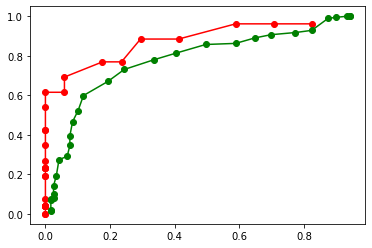

In [30]:
RangeThresh_SLUMS = range(1, 31, 1)
AllThresh = []

for Th_i in RangeThresh_SLUMS:

    temp = []
    temp.append( Th_i )

    P_var = 0
    TP_var = 0

    N_var = 0
    TN_var = 0

    for k in range( len(AllUsers_Performance) ):
        if ( float(AllUsers_Performance[k][1]) == float(1) ):
            P_var = P_var + 1
            if( float(AllUsers_Performance[k][4]) < float(Th_i) ):
                TP_var = TP_var + 1
    temp.append( float(TP_var)/float(P_var) )


    for k in range( len(AllUsers_Performance) ):
        if ( float(AllUsers_Performance[k][1]) == float(0) ):
            N_var = N_var + 1
            if( float(AllUsers_Performance[k][4]) >= float(Th_i) ):
                TN_var = TN_var + 1
    temp.append( float(TN_var)/float(N_var) )

    AllThresh.append( temp )

SLUMSVarThresh_Sensitivity_List = []
SLUMSVarThresh_Specificity_List = []
SLUMSVarThresh_FalsePositiveRate_List = []

for i in range( len(AllThresh)  ):
    SLUMSVarThresh_Sensitivity_List.append( AllThresh[i][1] )
    SLUMSVarThresh_Specificity_List.append( AllThresh[i][2] )
    SLUMSVarThresh_FalsePositiveRate_List.append( float(1.0) - float(AllThresh[i][2]) )




RangeThresh_SLUMS = range(1, 31, 1)
AllThresh = []

for Th_i in RangeThresh_SLUMS:

    temp = []
    temp.append( Th_i )

    P_var = 0
    TP_var = 0

    N_var = 0
    TN_var = 0

    for k in range( len(AllUsers_Performance) ):
        if ( float(AllUsers_Performance[k][1]) == float(1) ):
            P_var = P_var + 1
            if( float(AllUsers_Performance[k][5]) < float(Th_i) ):
                TP_var = TP_var + 1
    temp.append( float(TP_var)/float(P_var) )


    for k in range( len(AllUsers_Performance) ):
        if ( float(AllUsers_Performance[k][1]) == float(0) ):
            N_var = N_var + 1
            if( float(AllUsers_Performance[k][5]) >= float(Th_i) ):
                TN_var = TN_var + 1
    temp.append( float(TN_var)/float(N_var) )

    AllThresh.append( temp )

SLUMSVarThresh_Sensitivity_List2 = []
SLUMSVarThresh_Specificity_List2 = []
SLUMSVarThresh_FalsePositiveRate_List2 = []

for i in range( len(AllThresh)  ):
    SLUMSVarThresh_Sensitivity_List2.append( AllThresh[i][1] )
    SLUMSVarThresh_Specificity_List2.append( AllThresh[i][2] )
    SLUMSVarThresh_FalsePositiveRate_List2.append( float(1.0) - float(AllThresh[i][2]) )

#print AllThresh  
#plt.plot(SLUMSVarThresh_FalsePositiveRate_List2, SLUMSVarThresh_Sensitivity_List2, 'ko-')
plt.plot(SLUMSVarThresh_FalsePositiveRate_List, SLUMSVarThresh_Sensitivity_List, 'ro-')
plt.plot(SLUMSVarThresh_FalsePositiveRate_List2, SLUMSVarThresh_Sensitivity_List2, 'go-')

print( "----")

print( metrics.auc(SLUMSVarThresh_FalsePositiveRate_List, SLUMSVarThresh_Sensitivity_List) )
print( metrics.auc(SLUMSVarThresh_FalsePositiveRate_List2, SLUMSVarThresh_Sensitivity_List2) )


        